<a href="https://colab.research.google.com/github/rajasafi/Duplicate-question-pair/blob/main/Duplicate_Question_Pair_improving_using_feature_extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# When we were using  only BOW and training our model Randomforest and XGBoost Classifier we were getting a Accuracy around 75 and 73.

> Now we are knowing that we will get that much Accuracy,


> So, next we will try to increase the Accuracy of our model

# **`To increase the  Accuracy of our Model we will Do Feature engineering`**

> Feature engineering is a machine learning technique that leverages data to create new variables that aren't in the training set.









In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [69]:
data=pd.read_csv('/content/train.csv')

In [70]:
data.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [71]:
new_data = data.sample(30000,random_state=2)

In [72]:
new_data.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [73]:
new_data.head()

,id,qid1,qid2,question1,question2,is_duplicate
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0


In [74]:
new_data.duplicated().sum()

0

0    19013
1    10987
Name: is_duplicate, dtype: int64
0    63.376667
1    36.623333
Name: is_duplicate, dtype: float64


<Axes: >

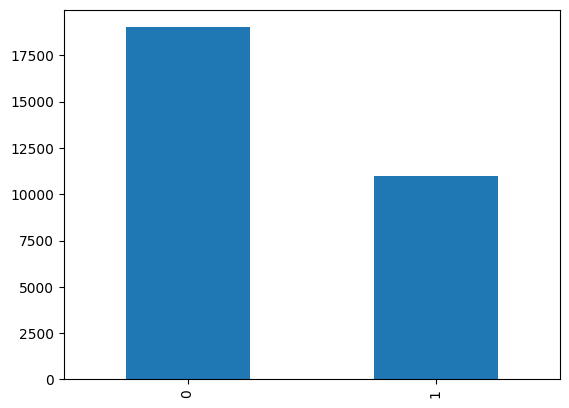

In [75]:
# Distribution of  duplicate and non-duplicate questions

print(new_data['is_duplicate'].value_counts())
print((new_data['is_duplicate'].value_counts()/new_data['is_duplicate'].count())*100)
new_data['is_duplicate'].value_counts().plot(kind='bar')

In [76]:
qtId = pd.Series(new_data['qid1'].to_list() + new_data['qid2'].to_list())
print('unique question : ',np.unique(qtId).shape[0])
x=qtId.value_counts()>1
print('question get repeated',x[x].shape[0])


unique question :  55299
question get repeated 3480


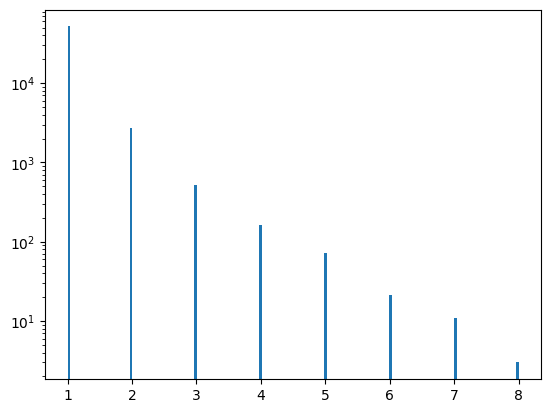

In [77]:
plt.hist(qtId.value_counts().values,bins=160)
plt.yscale('log')
plt.show()

Now we will do feature engineering on the data.

# we will going to do feature engineering on the data.


> **`So, we will going to ADD 7 new Features on our DataSet`**


1.   q1_len → char length of q1

2.   q2_len → char length of q2

3.   q1_num_words → words in q1
4.   q2_num_words → words in q2
5.   common_words → common unique words
6.   total_words → Total words in q1 + Total words in q2
7.   word share → common_words/Total_words



```
#  After performing feature engineering in dataset there will going to ADD new 7 Column
```











In [78]:
# Feature Engenering
new_data['q1_len'] = new_data['question1'].str.len()
new_data['q2_len'] = new_data['question2'].str.len()

In [79]:
new_data.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35,50


In [80]:
new_data['q1_num_words'] = new_data['question1'].apply(lambda x: len(str(x).split(" ")))
new_data['q2_num_words'] = new_data['question2'].apply(lambda x: len(str(x).split(" ")))
new_data.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77,12,12
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57,12,15
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120,25,17
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146,12,30
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35,50,5,9


In [81]:
def common_words(row):
  w1 =set(map(lambda x:x.lower().strip(),row['question1'].split(" ")))
  w2 =set(map(lambda x:x.lower().strip(),row['question2'].split(" ")))
  return len(w1 & w2)

In [82]:
new_data['common_words'] = new_data.apply(common_words,axis=1)
new_data.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,common_words
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77,12,12,11
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57,12,15,7
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120,25,17,2
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146,12,30,0
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35,50,5,9,3


In [83]:
def total_words(row):
  w1 =set(map(lambda x:x.lower().strip(),row['question1'].split(" ")))
  w2 =set(map(lambda x:x.lower().strip(),row['question2'].split(" ")))
  return len(w1 | w2)

new_data['total_words'] = new_data.apply(total_words,axis=1)
new_data.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,common_words,total_words
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77,12,12,11,13
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57,12,15,7,16
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120,25,17,2,32
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146,12,30,0,32
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35,50,5,9,3,10


In [84]:
new_data['word_share'] = round(new_data['common_words']/new_data['total_words'],2)
new_data.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,common_words,total_words,word_share
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77,12,12,11,13,0.85
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57,12,15,7,16,0.44
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120,25,17,2,32,0.06
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146,12,30,0,32,0.00
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35,50,5,9,3,10,0.30


minimum character length :  2
maximum character length :  391
mean character length :  59


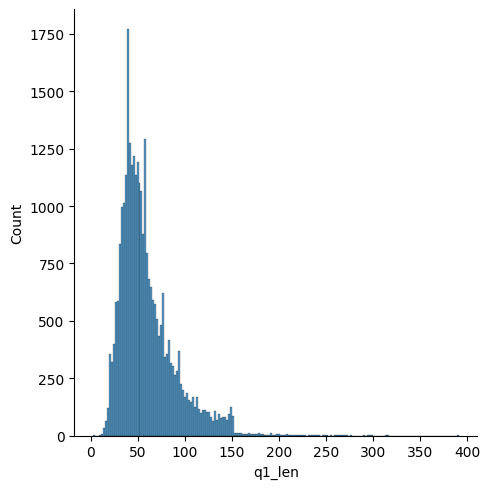

In [85]:
#Analysis of features
sns.displot(new_data['q1_len'])

print('minimum character length : ',new_data['q1_len'].min())
print('maximum character length : ',new_data['q1_len'].max())
print('mean character length : ',int(new_data['q1_len'].mean()))

minimum character length :  6
maximum character length :  1151
mean character length :  60


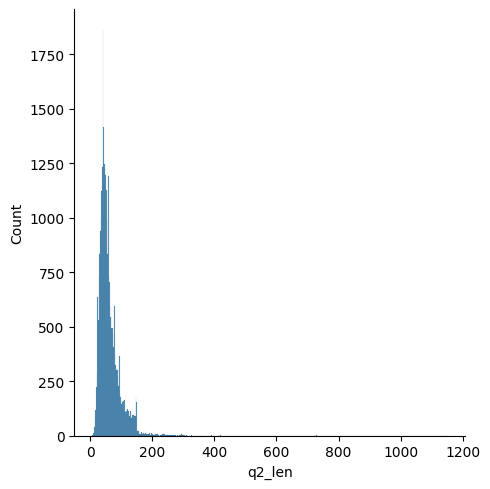

In [86]:
sns.displot(new_data['q2_len'])
print('minimum character length : ',new_data['q2_len'].min())
print('maximum character length : ',new_data['q2_len'].max())
print('mean character length : ',int(new_data['q2_len'].mean()))

minimum number of words :  1
maximum number of words :  72
mean number of words :  10


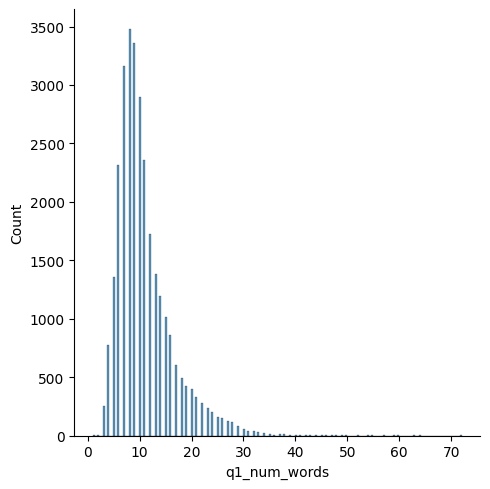

In [87]:
sns.displot(new_data['q1_num_words'])
print('minimum number of words : ',new_data['q1_num_words'].min())
print('maximum number of words : ',new_data['q1_num_words'].max())
print('mean number of words : ',int(new_data['q1_num_words'].mean()))

minimum number of words :  1
maximum number of words :  237
mean number of words :  11


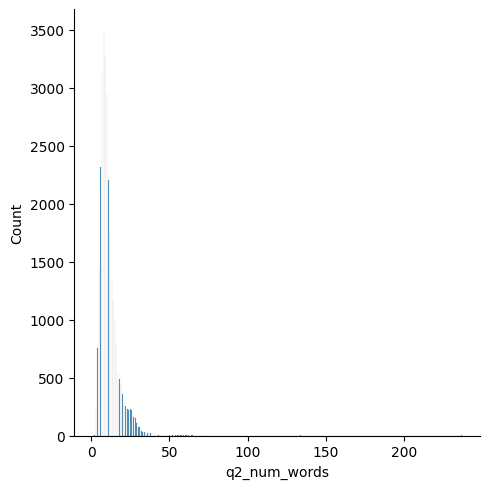

In [88]:
sns.displot(new_data['q2_num_words'])
print('minimum number of words : ',new_data['q2_num_words'].min())
print('maximum number of words : ',new_data['q2_num_words'].max())
print('mean number of words : ',int(new_data['q2_num_words'].mean()))

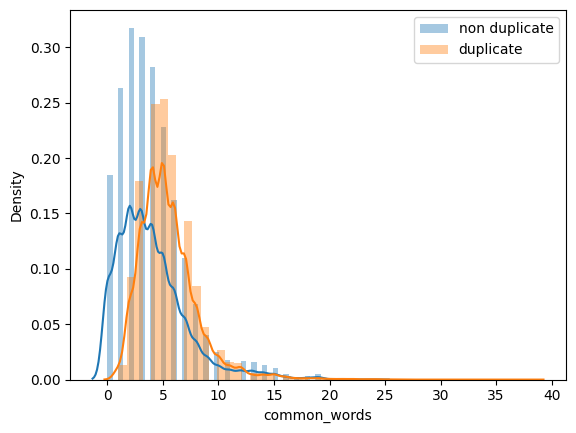

In [89]:
#common_words
sns.distplot(new_data[new_data['is_duplicate']==0]['common_words'],label='non duplicate')
sns.distplot(new_data[new_data['is_duplicate']==1]['common_words'],label='duplicate')
plt.legend()
plt.show()

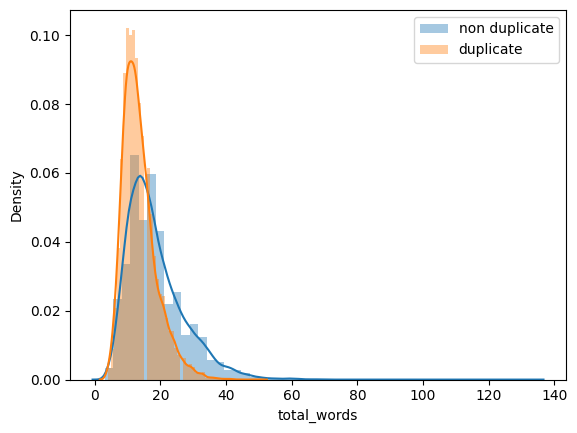

In [90]:
#total words
sns.distplot(new_data[new_data['is_duplicate']==0]['total_words'],label='non duplicate')
sns.distplot(new_data[new_data['is_duplicate']==1]['total_words'],label='duplicate')
plt.legend()
plt.show()

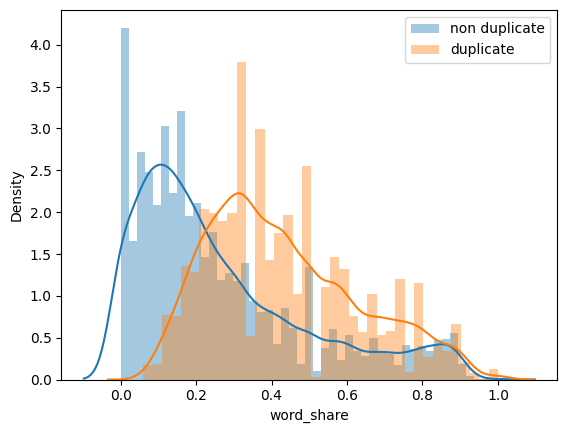

In [91]:
# Word share 
sns.distplot(new_data[new_data['is_duplicate']==0]['word_share'],label='non duplicate')
sns.distplot(new_data[new_data['is_duplicate']==1]['word_share'],label='duplicate')
plt.legend()
plt.show()


In [92]:
ques_data=new_data[['question1','question2']]
ques_data.head()

,question1,question2
398782,What is the best marketing automation tool for...,What is the best marketing automation tool for...
115086,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...
327711,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...
367788,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...
151235,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...


In [93]:
final_data=new_data.drop(columns=['id','qid1','qid2','question1','question2'])
final_data.shape

(30000, 8)

In [94]:
final_data.head()

,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,common_words,total_words,word_share
398782,1,76,77,12,12,11,13,0.85
115086,0,49,57,12,15,7,16,0.44
327711,0,105,120,25,17,2,32,0.06
367788,0,59,146,12,30,0,32,0.00
151235,0,35,50,5,9,3,10,0.30


In [98]:
from sklearn.feature_extraction.text import CountVectorizer

question=list(ques_data['question1']) + list(ques_data['question2'])
cv=CountVectorizer(max_features=3000)
q1_arr,q2_arr=np.vsplit(cv.fit_transform(question).toarray(),2)

In [99]:
temp_data1=pd.DataFrame(q1_arr,index= ques_data.index)
temp_data2=pd.DataFrame(q2_arr,index= ques_data.index)
temp_data=pd.concat([temp_data1,temp_data2],axis=1)
temp_data.shape

(30000, 6000)

In [100]:
final_data=pd.concat([final_data,temp_data],axis=1)
final_data.shape

(30000, 6008)

In [101]:
final_data.head()

,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,common_words,total_words,word_share,0,1,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
398782,1,76,77,12,12,11,13,0.85,0,0,...,0,0,0,0,0,0,0,0,0,0
115086,0,49,57,12,15,7,16,0.44,0,0,...,0,0,0,0,0,0,0,0,0,0
327711,0,105,120,25,17,2,32,0.06,0,0,...,0,0,0,0,0,0,0,0,0,0
367788,0,59,146,12,30,0,32,0.00,0,0,...,0,0,0,1,0,0,0,0,0,0
151235,0,35,50,5,9,3,10,0.30,0,0,...,0,0,0,0,0,0,0,0,0,0


In [102]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(final_data.iloc[:,1:].values,final_data.iloc[:,0].values,test_size=0.2,random_state=1)

In [103]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
accuracy_score(y_test,y_pred)


0.7681666666666667

In [104]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(X_train,y_train)
y_pred=xgb.predict(X_test)
accuracy_score(y_test,y_pred)

0.7665